In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset into a pandas dataframe
df = pd.read_excel('superstore.ods')

In [3]:
df.head(10 )

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [4]:
#getting information about the dataframe
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
#describing the dataframe
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156103,28.616097
std,2885.163629,32063.693350,623.245101,2.225110,0.206479,234.258359
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.724800
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.635600
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.321800
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#calculating the number of customers
df['Customer Name'].nunique()

793

In [7]:
#calculating the  unique number of products sold
df['Product ID'].nunique()

1862

In [8]:
#finding out the number of countries they operate in
df['Country'].nunique()

1

In [9]:
#states
df['State'].nunique()

49

In [10]:
#cities
df['City'].nunique()

531

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


<Axes: xlabel='Ship Mode'>

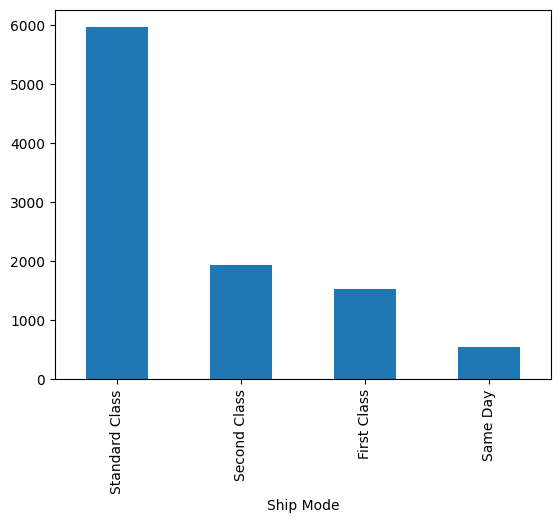

In [11]:
#analysing the data to find out the most preferred shipping mode

shipping_mode = df['Ship Mode'].value_counts()
print(shipping_mode)

shipping_mode.plot(kind='bar')



Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


<Axes: xlabel='Category'>

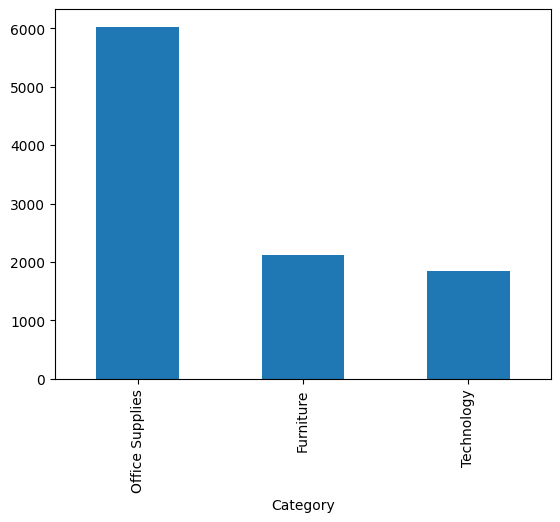

In [12]:
#analysing the data to see which category had the most sales
category = df['Category'].value_counts()
print(category)

category.plot(kind='bar')

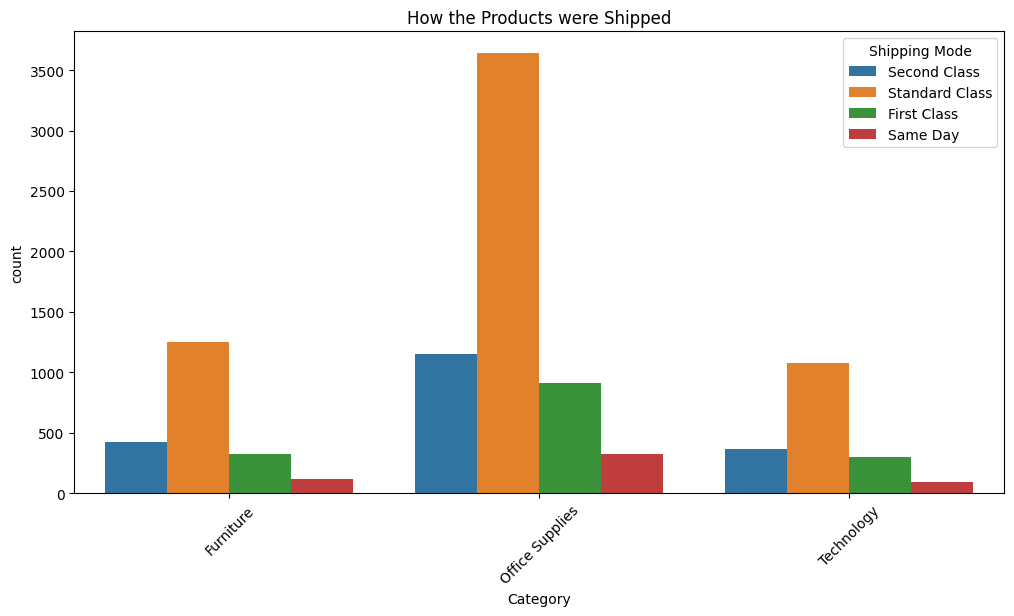

In [13]:
#visualizing how the product categories were shipped

#setting the figure size
plt.figure(figsize=(12,6))

#plotting the data
ax = sns.countplot(x='Category', hue='Ship Mode', data=df)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.title('How the Products were Shipped')
plt.legend(title='Shipping Mode')
plt.show()

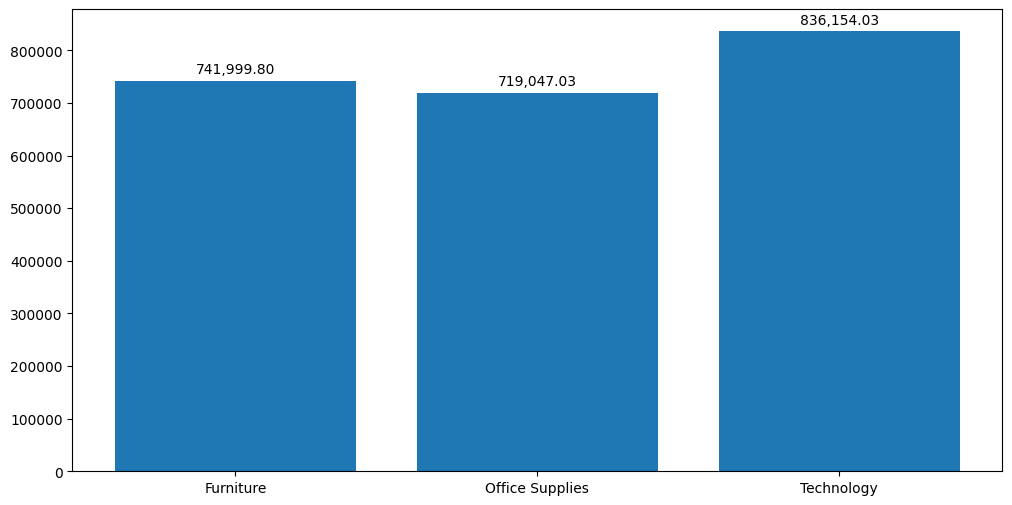

In [25]:
#visualizing the total sales for each category
#changing the sales column datatype to float
df['Sales'] = df['Sales'].astype(float)

#grouping the data
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

#plotting a bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(category_sales['Category'], category_sales['Sales'])

#annotating the bar plot with their values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

#plt.tight_layout()
plt.show()

In [15]:
#creating a column Shipping days to show the number of days taken to ship the product

#changing the order date and ship date columns to Datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Creating a column 'Shipping Days' to show the number of days taken to ship the product
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [16]:
df['Shipping Days'].describe()

count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Days, dtype: float64

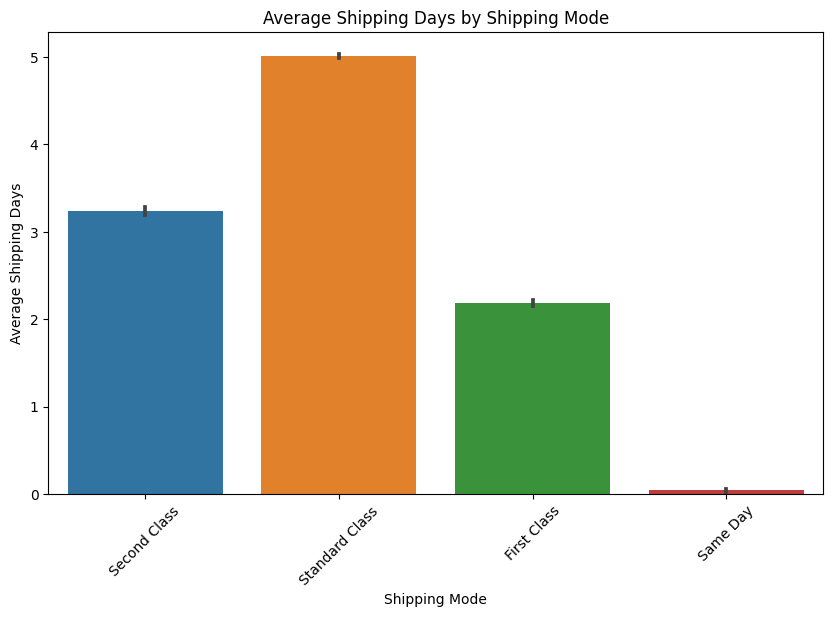

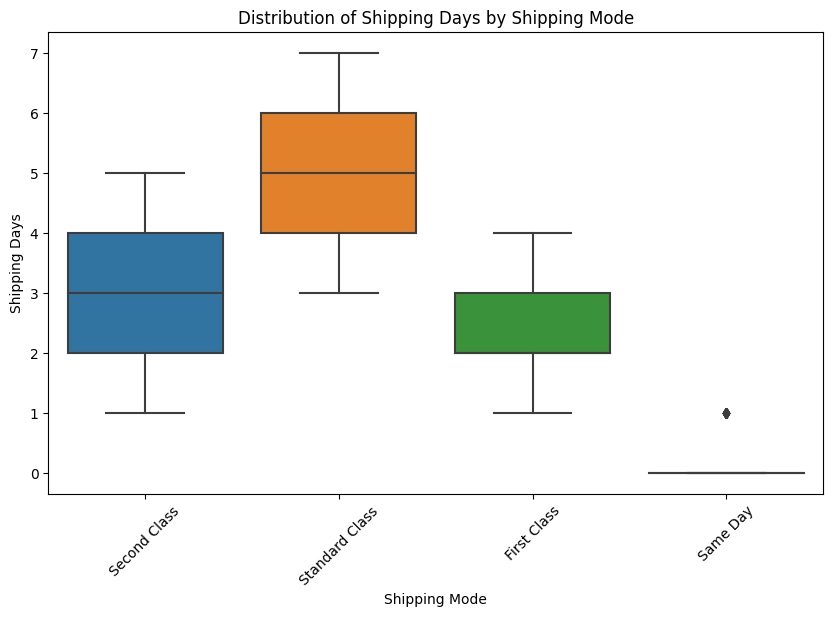

In [17]:
# Create a bar chart to show the average shipping days for each shipping mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Shipping Days', data=df)
plt.xlabel('Shipping Mode')
plt.ylabel('Average Shipping Days')
plt.title('Average Shipping Days by Shipping Mode')
plt.xticks(rotation=45)
plt.show()

# Create a box plot to visualize the distribution of shipping days for each shipping mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Shipping Days', data=df)
plt.xlabel('Shipping Mode')
plt.ylabel('Shipping Days')
plt.title('Distribution of Shipping Days by Shipping Mode')
plt.xticks(rotation=45)
plt.show()

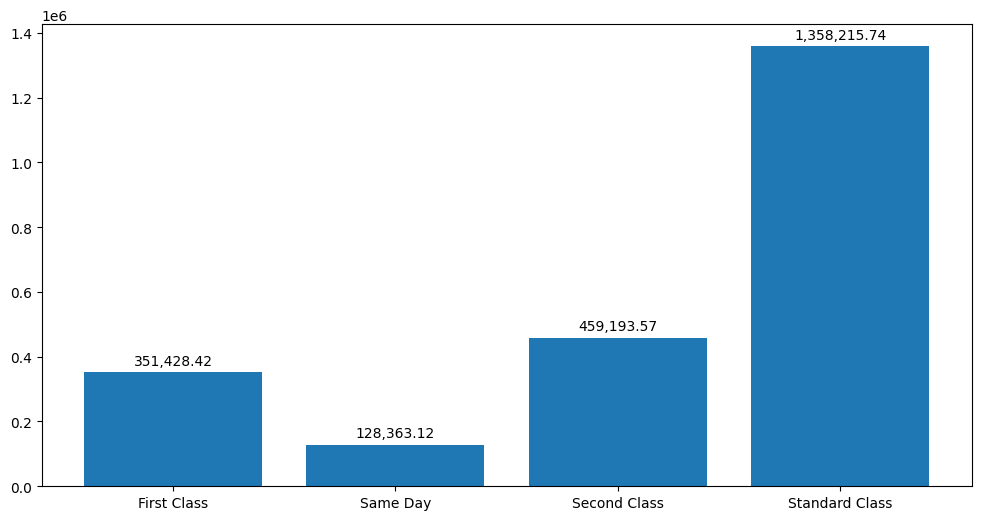

In [24]:
#visualizing the amount of sales per shipping mode

#grouping the data
shipping_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()

#plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(shipping_sales['Ship Mode'], shipping_sales['Sales'])

#annotating the bar plot with their values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

#plt.tight_layout()
plt.show()